In [2]:
import pandas as pd
data=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
print(data['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [4]:
data['Age'].isnull().sum()

177

In [5]:
for feature in data.columns:
    nulls=data[feature].isnull().sum()
    print(nulls)

0
0
177
0


In [6]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Age'].isnull().sum()

0

In [7]:
y=data.iloc[:,0]
x=data.iloc[:,1:]

In [8]:
x.head()


,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=0)

In [10]:
xtrain

,Pclass,Age,Fare
242,2,29.0,10.5000
344,2,36.0,13.0000
170,1,61.0,33.5000
187,1,45.0,26.5500
800,2,34.0,13.0000
...,...,...,...
835,1,39.0,83.1583
192,3,19.0,7.8542
629,3,28.0,7.7333
559,3,36.0,17.4000


### STANDARDIZATION TRANSFORMATION


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtrain_scaled

G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.34363182, -0.03598323, -0.45510318],
       [-0.34363182,  0.50499701, -0.4033367 ],
       [-1.53435605,  2.43706929,  0.02114842],
       ...,
       [ 0.8470924 , -0.11326612, -0.51239211],
       [ 0.8470924 ,  0.50499701, -0.3122277 ],
       [-0.34363182,  2.3597864 ,  0.13503467]])

In [12]:
xtest_scaled=scaler.transform(xtest)
xtest_scaled

G:\ANACONDA_INSTALLATION\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 8.47092403e-01, -1.13266116e-01, -3.73140283e-01],
       [ 8.47092403e-01, -1.13266116e-01, -5.16187627e-01],
       [ 8.47092403e-01, -1.73620683e+00, -6.94429204e-02],
       [-1.53435605e+00, -1.13266116e-01,  2.36142393e+00],
       [ 8.47092403e-01, -3.59832253e-02, -3.56833842e-01],
       [-1.53435605e+00, -1.13266116e-01, -4.09713574e-02],
       [-1.53435605e+00,  8.14128577e-01,  2.50516287e+00],
       [-1.53435605e+00,  1.18582557e-01,  2.74130498e+00],
       [-1.53435605e+00, -3.45114790e-01,  1.21341738e+00],
       [ 8.47092403e-01, -1.13266116e-01, -5.22830301e-01],
       [ 8.47092403e-01, -2.67831899e-01, -5.09888682e-01],
       [-3.43631824e-01,  8.14128577e-01, -4.03336705e-01],
       [ 8.47092403e-01, -1.13266116e-01, -5.12046309e-01],
       [-3.43631824e-01, -1.73620683e+00, -1.28974370e-01],
       [-1.53435605e+00, -4.22397681e-01,  1.04940254e+00],
       [ 8.47092403e-01, -1.19522659e+00, -5.09888682e-01],
       [ 8.47092403e-01, -4.99680572e-01

In [13]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(xtrain_scaled,ytrain)
prediction=classification.predict(xtest_scaled)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(ytest,prediction)
print(accuracy)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest,prediction)
accuracy

G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

[[162  22]
 [ 65  46]]


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.7050847457627119

# MIN MAX SCALING

# MIN MAX SCALING MAINLY USED FOR DEEP LEARNING TECHNIQUES
SCALED BETWEEN 0 TO 1  XSCALED= (X-XMIN)/(XMAX-XMIN)

In [14]:
from sklearn.preprocessing import MinMaxScaler 
min_max=MinMaxScaler()
data_minmax=pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
data_minmax.head()


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [15]:
x=data_minmax.iloc[:,1:]
y=data_minmax.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.33,random_state=0)
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(xtrain1,ytrain1)
prediction=classification.predict(xtest1)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(ytest1,prediction)
print(accuracy)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest1,prediction)
accuracy

[[164  20]
 [ 64  47]]


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.7152542372881356

# ROBUST SCALER

ROBUST SCALER ARE ROBUST TO OUTLIERS. IT TRANSFORMS THE FEATURE BASED ON MEDIAN
AND QUANTILES. THE SCALING IS UNEFFECTED BY  OUTLIERS PRESENT IN THE DATA
XSCALED= X- Xmedian/IQR

IQR = 75TH QUANTILE - 25TH QUANTILE



In [17]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.33,random_state=0)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
xtrainscaled=pd.DataFrame(scaler.fit_transform(xtrain1))
xtestscaled=scaler.fit_transform(xtest1)


In [18]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(xtrainscaled,ytrain1)
prediction=classification.predict(xtestscaled)
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(ytest1,prediction)
print(accuracy)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest1,prediction)
accuracy

[[152  32]
 [ 49  62]]


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.7254237288135593

# GAUSSIAN TRANSFORMATION

Machine learning algorithms such as Linear and Logistic regression assume 
that the features are normally distributed and gives better accurancy 
and Performance.

In [20]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y,test_size=0.33,random_state=0)


In [22]:
#Checking if data has gaussian distribution or normal distribution we will 
# use QQ plot
import matplotlib.pyplot as plt
#import scipy.stat as stat
#import pylab
def plt_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
 #   plt.subplot(1,2,2)
 #   stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

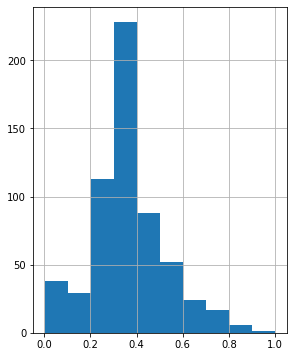

In [23]:
plt_data(xtrain2,'Age')

G:\ANACONDA_INSTALLATION\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


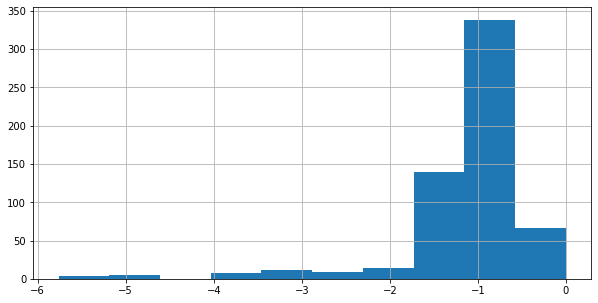

In [26]:
import numpy as np
xtrain2['Age']=np.log(xtrain2['Age'])
plt.figure(figsize=(10,5))
xtrain2['Age'].hist()
plt.show()

As observed above the LOGARTHIMIC TRANSFORMATION has made the let skewed
So dont use the log transformation which skews the data to either Right or Left

# OTHER TRANFORMATION  ARE
#  RECIPROCAL TRANSFORMATION
#  SQUAREROOT TRANSFORMATION
#  EXPONENTIAL TRANSFORMATION
#  BOXCOX TRANFORMATION